In [2]:

!pip install pandas scikit-learn


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [4]:
df = pd.read_csv("/content/Dataco.csv")
df.head()


,Additional Order items,Category Name,Customer City,Customer Country,Customer Fname,Customer Id,Customer Segment,Customer State,Customer Zipcode,Market,Order Customer Id,Order Date,Order Id,Order Region,Order Item Total,Order Quantity,Product Price,Profit Margin,Profit Per Order,Sales
0,Camping & Hiking,Camping & Hiking,Caguas,Puerto Rico,Sean,568,Consumer,PR,725.0,LATAM,568,17-06-2017,61558,South America,269.980011,1,299.980011,26.10%,78.290001,800.000000
1,Camping & Hiking,Camping & Hiking,Caguas,Puerto Rico,Carol,3341,Consumer,PR,725.0,LATAM,3341,18-04-2017,57472,South America,269.980011,1,299.980011,-5.40%,-16.200001,800.000000
2,Camping & Hiking,Camping & Hiking,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680.0,LATAM,7459,24-05-2017,59898,Central America,263.980011,1,299.980011,3.90%,11.620000,800.000000
3,Camping & Hiking,Camping & Hiking,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680.0,LATAM,7459,24-05-2017,59898,Central America,260.980011,1,299.980011,-1.10%,-3.390000,800.000000
4,Hunting & Shooting,Hunting & Shooting,Caguas,Puerto Rico,Mary,10740,Consumer,PR,725.0,LATAM,10740,05-06-2017,58644,Central America,130.490005,1,149.990005,-63.80%,-95.650002,149.990005


In [5]:
df = df.dropna()
df = df.drop(columns=["Order Id", "Order Date", "Customer Fname", "Customer Id", "Customer Zipcode"])

df.head()


,Additional Order items,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Market,Order Customer Id,Order Region,Order Item Total,Order Quantity,Product Price,Profit Margin,Profit Per Order,Sales
0,Camping & Hiking,Camping & Hiking,Caguas,Puerto Rico,Consumer,PR,LATAM,568,South America,269.980011,1,299.980011,26.10%,78.290001,800.000000
1,Camping & Hiking,Camping & Hiking,Caguas,Puerto Rico,Consumer,PR,LATAM,3341,South America,269.980011,1,299.980011,-5.40%,-16.200001,800.000000
2,Camping & Hiking,Camping & Hiking,Mayaguez,Puerto Rico,Consumer,PR,LATAM,7459,Central America,263.980011,1,299.980011,3.90%,11.620000,800.000000
3,Camping & Hiking,Camping & Hiking,Mayaguez,Puerto Rico,Consumer,PR,LATAM,7459,Central America,260.980011,1,299.980011,-1.10%,-3.390000,800.000000
4,Hunting & Shooting,Hunting & Shooting,Caguas,Puerto Rico,Consumer,PR,LATAM,10740,Central America,130.490005,1,149.990005,-63.80%,-95.650002,149.990005


In [6]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [7]:
X = df_encoded.drop("Sales", axis=1)
y = df_encoded["Sales"]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [12]:
from sklearn.metrics import mean_squared_error

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred) ** 0.5)


R² Score: 0.7761715070678132
RMSE: 91.09074855427288


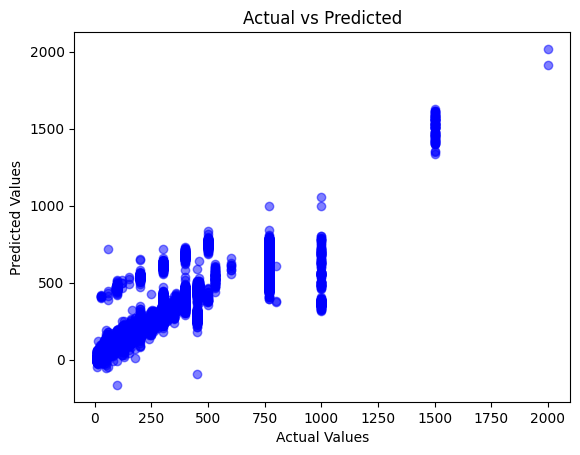

In [13]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()


## Insights:

- We used linear regression to predict `Sales` using product, region, category, profit, etc.
- The R² score tells us how well the model explains the variance in sales.
- RMSE indicates average error between predicted and actual sales.

This completes the predictive analysis task using the Dataco dataset.
